 **MNIST Classifier USING KERAS CNN **
> The following kernel is a machine learning model based on convolutional networks architecture  used to classify Handwritten digits from the MNIST dataset.

The kernel is divided into -- main parts.
1. Importing Necessary Libraries (keras,numpy,pandas,matplotlib)
2. Data Preprocessing
3. Splitting into Train-Test Split
4. Model Selection
5. Checking Model Effectiveness.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,BatchNormalization
from keras.optimizers import Adam,Adagrad #optimizers
from keras.datasets import mnist #Import datasets from inbulit Keras Datasets

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")


label is: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


TypeError: Invalid dimensions for image data

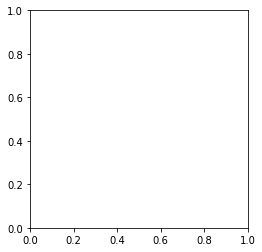

In [9]:
s=np.array(train)
labels=s[:,0]
pixels=s[:,1:785]
labels=keras.utils.to_categorical(labels,10)
#Data Reshaping
pixels=pixels.reshape(42000,28,28,1);
pixels=pixels/255
for i in range(10):
    print("label is:",labels[i])
    plt.imshow(pixels[i])
    plt.show()





In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,label_train,label_test=train_test_split(pixels,labels,test_size=0.2,random_state=0)

In [7]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1,)))
model.add(Conv2D(32,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(32,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        8224      
__________

In [11]:
model.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=['accuracy'])
model.fit(X_train,label_train,batch_size=64,epochs=40,validation_data=(X_test,label_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/40
33600/33600 [==============================] - 13s 395us/step - loss: 0.2236 - acc: 0.9295 - val_loss: 0.0959 - val_acc: 0.9713
Epoch 2/40
33600/33600 [==============================] - 10s 294us/step - loss: 0.0689 - acc: 0.9792 - val_loss: 0.0798 - val_acc: 0.9789
Epoch 3/40
33600/33600 [==============================] - 10s 294us/step - loss: 0.0524 - acc: 0.9842 - val_loss: 0.0611 - val_acc: 0.9850
Epoch 4/40
33600/33600 [==============================] - 10s 294us/step - loss: 0.0434 - acc: 0.9864 - val_loss: 0.0677 - val_acc: 0.9830
Epoch 5/40
33600/33600 [==============================] - 10s 293us/step - loss: 0.0388 - acc: 0.9877 - val_loss: 0.0763 - val_acc: 0.9789
Epoch 6/40
33600/33600 [==============================] - 10s 294us/step - loss: 0.0334 - acc: 0.9896 - val_loss: 0.0551 - val_acc: 0.9879
Epoch 7/40
33600/33600 [==============================] - 10s 295us/step - loss: 0.0279 - acc: 0.9912 - val_loss: 0.0

1


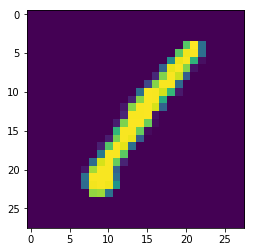

0


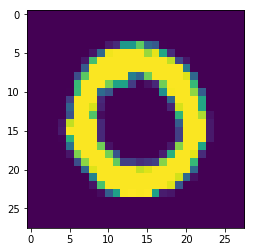

1


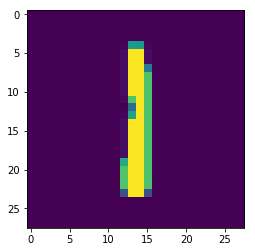

4


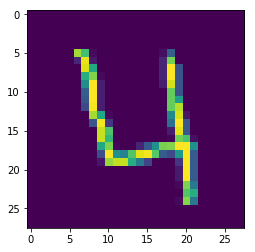

0


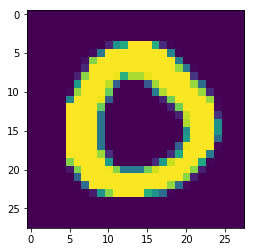

0


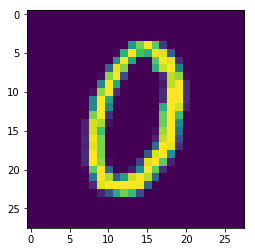

7


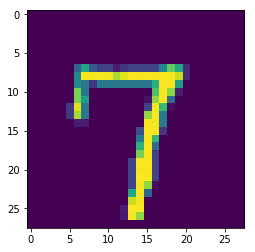

3


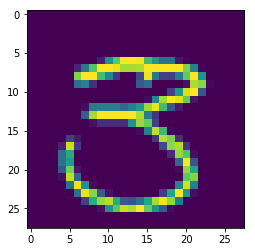

5


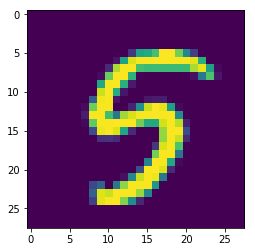

3


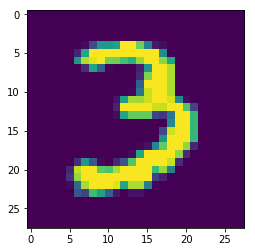

8


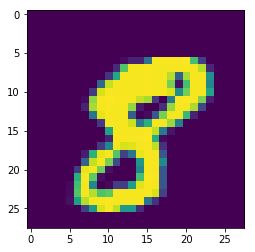

9


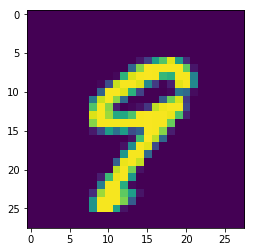

1


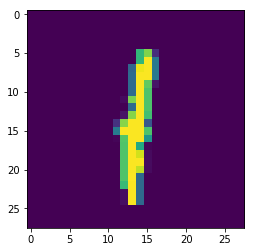

3


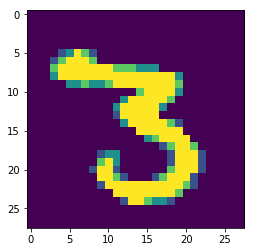

3


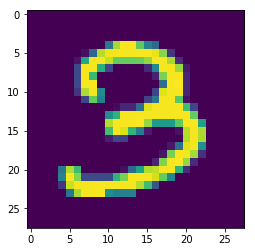

1


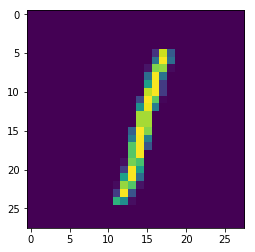

2


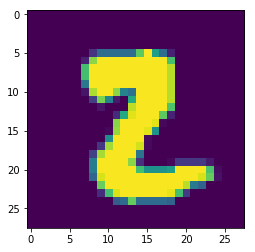

0


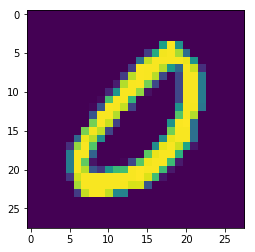

7


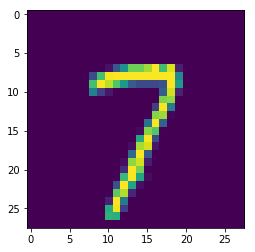

5


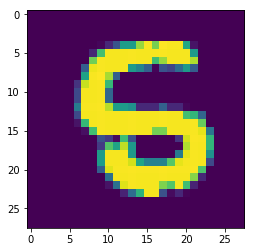

In [12]:
for i in range(20):
    print(model.predict(pixels[i].reshape(1,28,28,1)).argmax())
    plt.imshow(pixels[i].reshape(28,28))
    plt.show()
    

In [13]:
s1=np.array(test)
pixels1=s1[:,0:784]
#Data Reshaping
pixels1=pixels1.reshape(28000,28,28,1);
pixels1=pixels1/255

In [ ]:
mad=[0]*28000
sid=[0]*28000
for i in range(28000):
    #print(model.predict(pixels1[i].reshape(1,28,28,1)).argmax()," ",i+1)
    mad[i]=model.predict(pixels1[i].reshape(1,28,28,1)).argmax()
    sid[i]=i+1


In [ ]:
np.array(mad)
np.array(sid)




In [ ]:
my_sub=pd.DataFrame({"ImageId":sid,"Label":mad})
my_sub.to_csv('submission.csv', index=False)